In [25]:

import numpy as np
import pandas as pd

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('/content/dermatology_database_1.csv')

In [28]:
df_copy = df.copy()

In [29]:
df.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_granular_layer  vacuolisation_damage_basal_layer  spongiosis  \
0                             0                                 0           3   
1                             0                                 0           0   
2                             0                                 2           3   
3                             3                                 0           0   
4                             2                                 3           2   

   saw_tooth_appearance_retes  follicular_horn_plug  \
0                           0                     0   
1                           0                     0   
2                           2                     0   
3                           0                     0   
4                           3                     0   

   perifollicular_parakeratosis  inflammatory_mononuclear_infiltrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band_like_infiltrate  age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [30]:
df.shape

(366, 35)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [32]:
df.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  focal_hypergranulosis  \
count         366.000000  ...             366.000000   
mean            0.519126  ...               0.393443   
std             0.905639  ...               0.849406   
min             0.000000  ...               0.000000   
25%             0.000000  ...               0.000000   
50%             0.000000  ...               0.000000   
75%             1.000000  ...               0.000000   
max             3.000000  ...               3.000000   

       disappearance_granular_layer  vacuolisation_damage_basal_layer  \
count                    366.000000                        366.000000   
mean                       0.464481                          0.456284   
std                        0.864899                          0.954873   
min                        0.000000                          0.000000   
25%                        0.000000                          0.000000   
50%                        0.000000                          0.000000   
75%                        1.000000                          0.000000   
max                        3.000000                          3.000000   

       spongiosis  saw_tooth_appearance_retes  follicular_horn_plug  \
count  366.000000                  366.000000            366.000000   
mean     0.953552                    0.453552              0.103825   
std      1.130172                    0.954744              0.450433   
min      0.000000                    0.000000              0.000000   
25%      0.000000                    0.000000              0.000000   
50%      0.000000                    0.000000              0.000000   
75%      2.000000                    0.000000              0.000000   
max      3.000000                    3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_mononuclear_infiltrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.866120   
std                        0.488723                             0.726108   
min                        0.000000                             0.000000   
25%                        0.000000                             1.000000   
5

**Converting age column into integer**

In [33]:
df.age.isna().sum()

0

In [34]:
df.loc[df['age']=='?']

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
262         2        1                 0        2                   0   
263         1        1                 1        3                   0   
264         1        1                 0        2                   0   
265         1        1                 0        3                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
33                   0                   0                         0   
34                   0                   0                         0   
35                   0                   0                         0   
36                   3                   0                         2   
262                  0                   0                         0   
263                  0                   0                         0   
264                  0                   0                         0   
265                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
33                            1                  0  ...   
34                            0                  0  ...   
35                            0                  0  ...   
36                            0                  0  ...   
262                           0                  0  ...   
263                           0                  0  ...   
264                           1                  0  ...   
265                           0                  0  ...   

     disappearance_granular_layer  vacuolisation_damage_basal_layer  \
33                              0                                 0   
34                              0                                 0   
35                              0                                 0   
36                              0                                 2   
262                             0                                 0   
263                             0                                 0   
264                             0                                 0   
265                             0                                 0   

     spongiosis  saw_tooth_appearance_retes  follicular_horn_plug  \
33            0                           0                     0   
34            0                           0                     0   
35            0                           0                     0   
36            0                           2                     0   
262           2                           0                     0   
263           3                           0                     0   
264           2                           0                     0   
265           2                           0                     0   

     perifollicular_parakeratosis  inflammatory_mononuclear_infiltrate  \
33                              0                                    0   
34                              0                                    0   
35                              0                                    0   
36                              0                                    0   
262                             0                                    3   
263                             0                                    2   
264                             0                                    3   
265                             0                                    3   

     band_like_infiltrate  age  class  
33                      0    ?      1  
34                      0    ?      4  
35                      0    ?      2  
36                      3    ?      3  
262                     0    ?      5

In [35]:
df['age'] = pd.to_numeric(df['age'],errors='coerce')
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranulosis                  0
disappearance_granular_layer           0
vacuolisation_damage_basal_layer       0
spongiosis                             0
saw_tooth_appearance_retes             0
follicular_horn_plug                   0
perifollicular_parakeratosis           0
inflammatory_mononuclear_infiltrate    0
band_like_infiltrate                   0
age                                    8
class                                  0
dtype: int64

In [36]:
df.dropna(inplace = True)

In [37]:
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranulosis                  0
disappearance_granular_layer           0
vacuolisation_damage_basal_layer       0
spongiosis                             0
saw_tooth_appearance_retes             0
follicular_horn_plug                   0
perifollicular_parakeratosis           0
inflammatory_mononuclear_infiltrate    0
band_like_infiltrate                   0
age                                    0
class                                  0
dtype: int64

In [38]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')

In [39]:
X = df.drop('class',axis=1)
y = df['class']
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size =0.3,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((250, 34), (108, 34), (250,), (108,))

In [40]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluating SVM
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Training Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating Random Forest
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


SVM Results:
Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.94      0.89      0.91        18
           3       1.00      1.00      1.00        21
           4       0.88      0.93      0.90        15
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         6

    accuracy                           0.97       108
   macro avg       0.97      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108

Confusion Matrix:
 [[34  0  0  0  0  0]
 [ 0 16  0  2  0  0]
 [ 0  0 21  0  0  0]
 [ 0  1  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0  6]]

Random Forest Results:
Accuracy: 0.9814814814814815
Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.99        34
           2       0.95      1.00      0.97        18
     

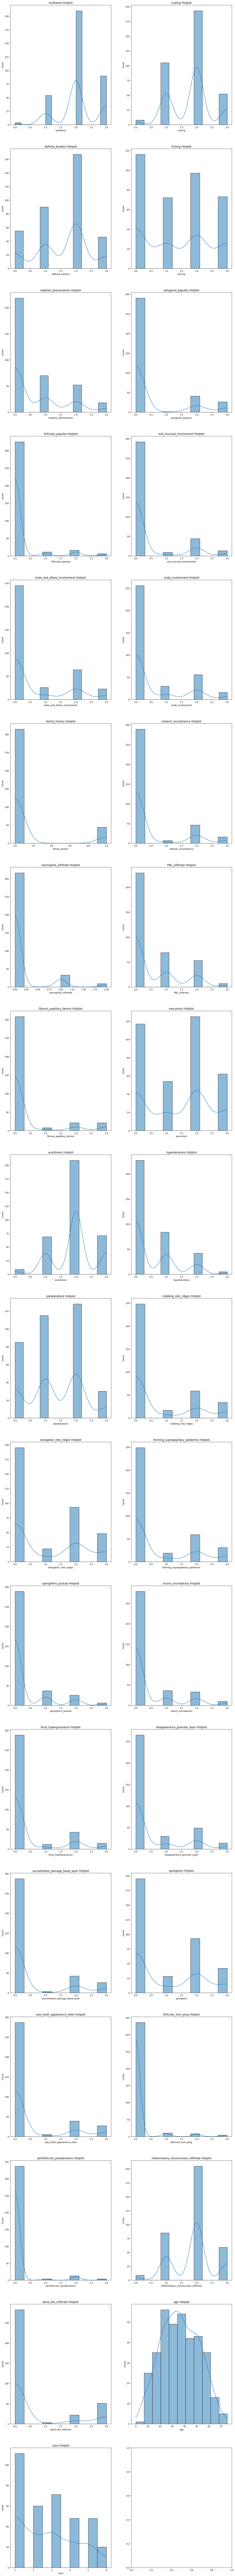

In [41]:
fig, axes = plt.subplots(nrows=(df.shape[1]//2)+1, ncols=2, figsize=(18, 6*df.shape[1]))
axes = axes.flatten()
for index,cols in enumerate(df.columns.tolist()):
      ax = axes[index]
      sns.histplot(df[cols],kde=True,ax=ax)
      ax.set_title(f'{cols} Histplot')
      ax.legend()
plt.show()


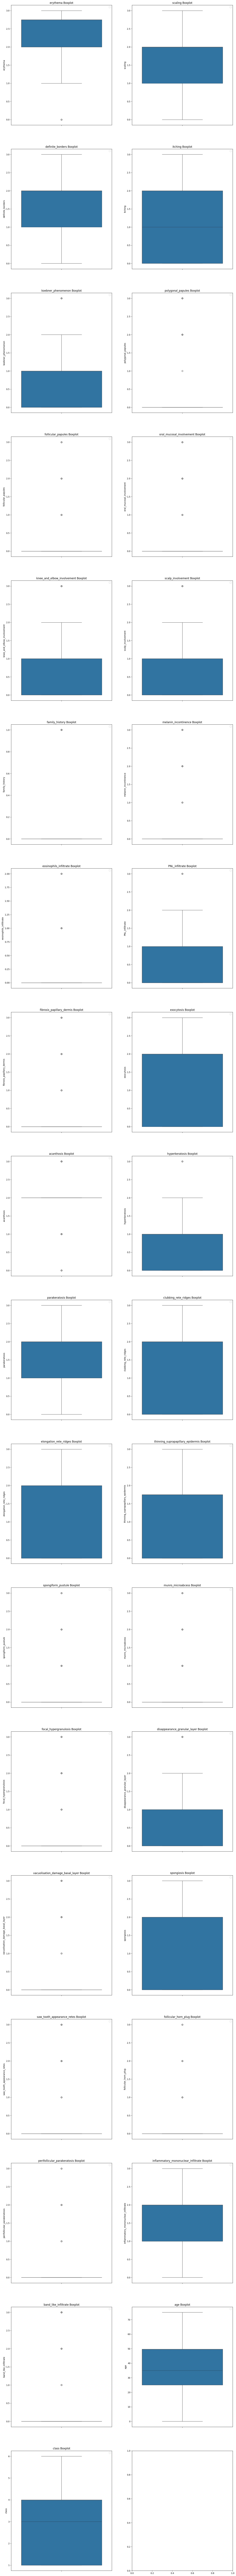

In [42]:
fig, axes = plt.subplots(nrows=(df.shape[1]//2)+1, ncols=2, figsize=(18, 6*df.shape[1]))
axes = axes.flatten()
for index,cols in enumerate(df.columns.tolist()):
      ax = axes[index]
      sns.boxplot(df[cols],ax=ax)
      ax.set_title(f'{cols} Boxplot')
      ax.legend()
plt.show()


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Removing outliers using IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out rows with any feature outside the bounds
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Splitting X and y before removing outliers
X = df.drop('class', axis=1)
y = df['class']

# Concatenate X and y for removing outliers
df_combined = pd.concat([X, y], axis=1)
df_cleaned = remove_outliers_iqr(df_combined)

# Separate cleaned X and y
X_cleaned = df_cleaned.drop('class', axis=1)
y_cleaned = df_cleaned['class']

# Splitting the cleaned dataset
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, random_state=42, test_size=0.3, stratify=y_cleaned)

# Training SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluating SVM
print("SVM Results After Removing Outliers:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Training Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating Random Forest
print("\nRandom Forest Results After Removing Outliers:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


SVM Results After Removing Outliers:
Accuracy: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.80      0.89         5
           4       0.88      1.00      0.93         7

    accuracy                           0.92        13
   macro avg       0.96      0.93      0.94        13
weighted avg       0.93      0.92      0.92        13

Confusion Matrix:
 [[1 0 0]
 [0 4 1]
 [0 0 7]]

Random Forest Results After Removing Outliers:
Accuracy: 0.8461538461538461
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.71      1.00      0.83         5
           4       1.00      0.86      0.92         7

    accuracy                           0.85        13
   macro avg       0.57      0.62      0.59        13
weighted avg       0.81      0.85      0.82        13



Boxplots Before Removing Outliers:


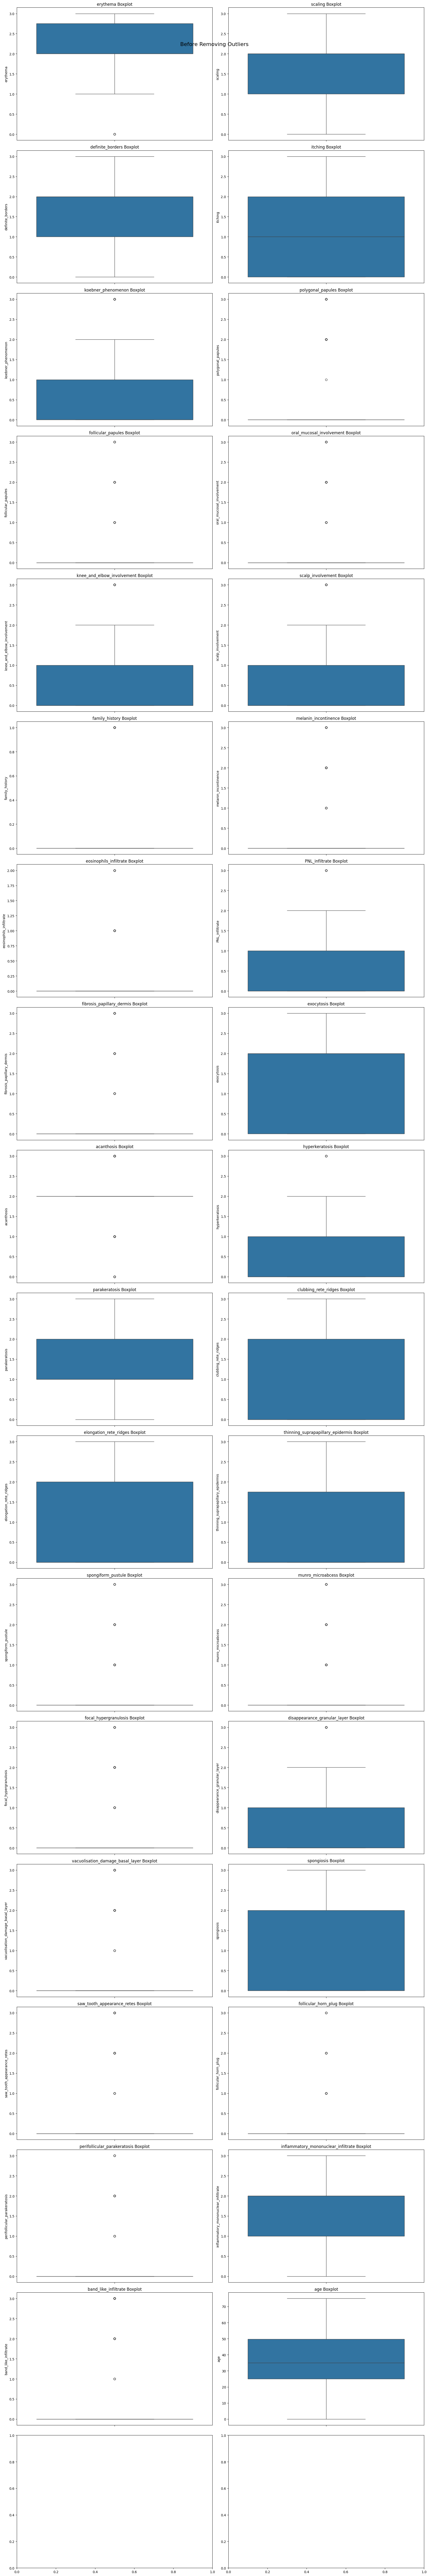

Boxplots After Removing Outliers:


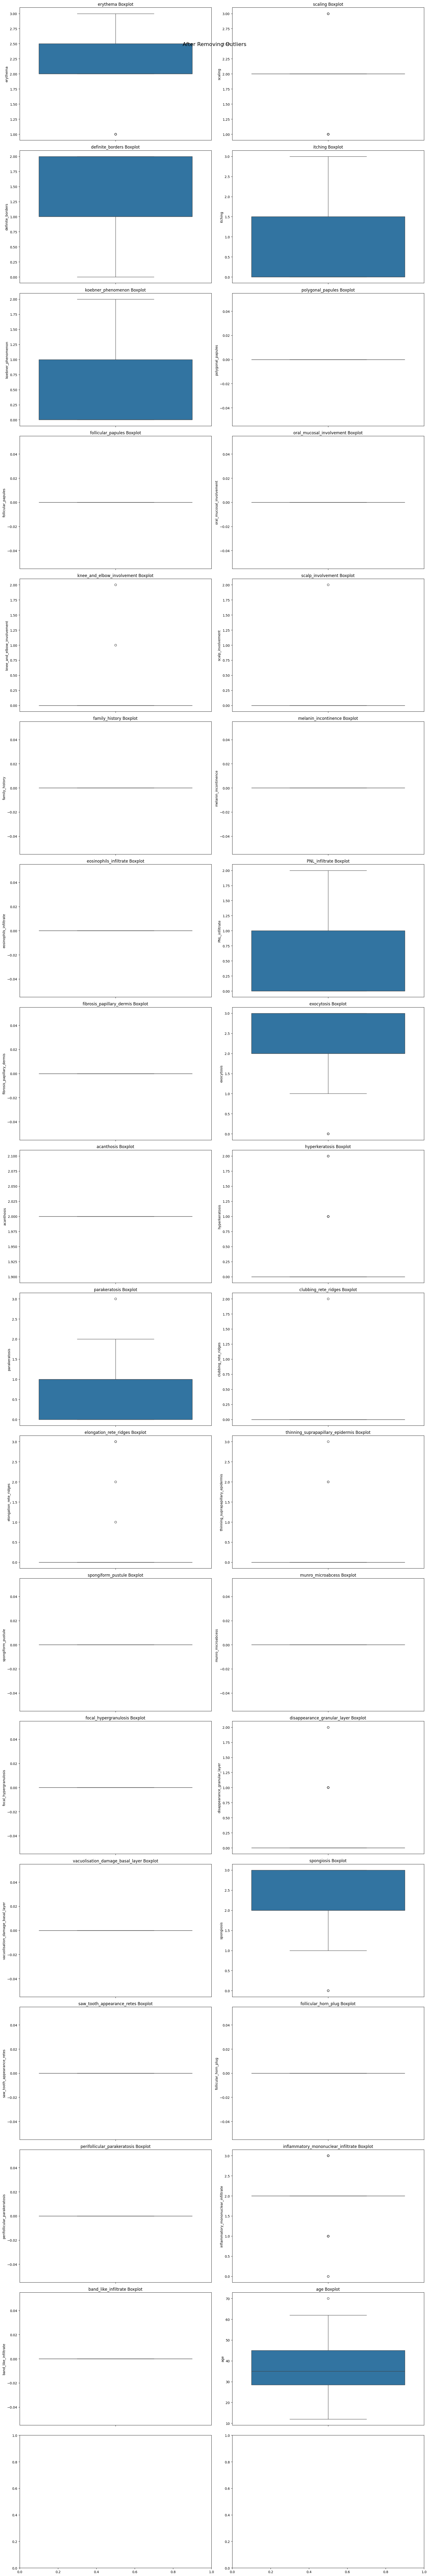


SVM Results After Removing Outliers:
Accuracy: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.80      0.89         5
           4       0.88      1.00      0.93         7

    accuracy                           0.92        13
   macro avg       0.96      0.93      0.94        13
weighted avg       0.93      0.92      0.92        13

Confusion Matrix:
 [[1 0 0]
 [0 4 1]
 [0 0 7]]

Random Forest Results After Removing Outliers:
Accuracy: 0.8461538461538461
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.71      1.00      0.83         5
           4       1.00      0.86      0.92         7

    accuracy                           0.85        13
   macro avg       0.57      0.62      0.59        13
weighted avg       0.81      0.85      0.82        13


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out rows with any feature outside the bounds
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Boxplot function
def plot_boxplots(df, title):
    fig, axes = plt.subplots(nrows=(df.shape[1] // 2) + 1, ncols=2, figsize=(18, 6 * (df.shape[1] // 2 + 1)))
    axes = axes.flatten()
    for index, cols in enumerate(df.columns.tolist()):
        if index < len(df.columns):
            sns.boxplot(df[cols], ax=axes[index])
            axes[index].set_title(f'{cols} Boxplot')
        else:
            axes[index].axis('off')  # Hide unused subplots
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot boxplots before removing outliers
print("Boxplots Before Removing Outliers:")
plot_boxplots(df.drop('class', axis=1), title="Before Removing Outliers")

# Removing outliers
X = df.drop('class', axis=1)
y = df['class']
df_combined = pd.concat([X, y], axis=1)
df_cleaned = remove_outliers_iqr(df_combined)

# Plot boxplots after removing outliers
print("Boxplots After Removing Outliers:")
plot_boxplots(df_cleaned.drop('class', axis=1), title="After Removing Outliers")

# Splitting the cleaned dataset
X_cleaned = df_cleaned.drop('class', axis=1)
y_cleaned = df_cleaned['class']
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, random_state=42, test_size=0.3, stratify=y_cleaned)

# Training and evaluating SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\nSVM Results After Removing Outliers:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Training and evaluating Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results After Removing Outliers:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting data
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

# Applying SMOTE to training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Checking class distribution after balancing
print("Class distribution before balancing:", y_train.value_counts())
print("Class distribution after balancing:", pd.Series(y_train_balanced).value_counts())


Class distribution before balancing: class
1    77
3    50
2    42
5    34
4    33
6    14
Name: count, dtype: int64
Class distribution after balancing: class
1    77
2    77
3    77
4    77
5    77
6    77
Name: count, dtype: int64


In [46]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluating SVM
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Training Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating Random Forest
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


SVM Results:
Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.94      0.89      0.91        18
           3       1.00      1.00      1.00        21
           4       0.88      0.93      0.90        15
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         6

    accuracy                           0.97       108
   macro avg       0.97      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108

Confusion Matrix:
 [[34  0  0  0  0  0]
 [ 0 16  0  2  0  0]
 [ 0  0 21  0  0  0]
 [ 0  1  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0  6]]

Random Forest Results:
Accuracy: 0.9814814814814815
Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.99        34
           2       0.95      1.00      0.97        18
     

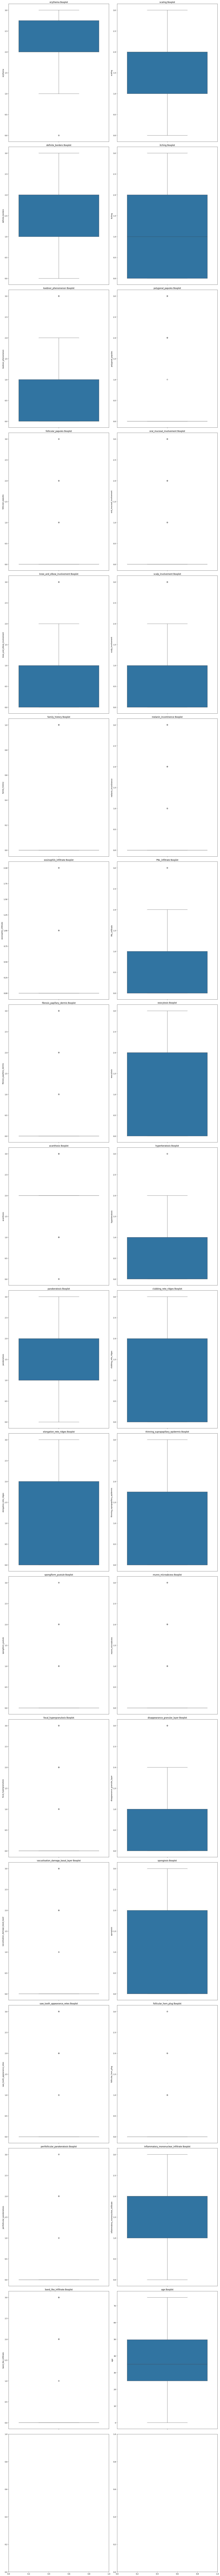

Data shape before outlier removal: (358, 35)
Data shape after outlier removal: (43, 35)


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers with boxplots
fig, axes = plt.subplots(nrows=(df.shape[1] // 2) + 1, ncols=2, figsize=(18, 6 * df.shape[1]))
axes = axes.flatten()

for index, col in enumerate(df.columns.tolist()):
    if col != 'class':  # Skip the target variable
        sns.boxplot(df[col], ax=axes[index])
        axes[index].set_title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

# Removing outliers using the IQR method
cleaned_df = df.copy()
for col in df.columns:
    if col != 'class':  # Skip the target variable
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Removing rows where the feature value is outside the bounds
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]

print("Data shape before outlier removal:", df.shape)
print("Data shape after outlier removal:", cleaned_df.shape)


In [48]:
# Splitting the cleaned dataset
X = cleaned_df.drop('class', axis=1)
y = cleaned_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (30, 34)
Testing set shape: (13, 34)


In [49]:
# Training SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluating SVM
print("SVM Results After Removing Outliers:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Training Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating Random Forest
print("\nRandom Forest Results After Removing Outliers:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


SVM Results After Removing Outliers:
Accuracy: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.80      0.89         5
           4       0.88      1.00      0.93         7

    accuracy                           0.92        13
   macro avg       0.96      0.93      0.94        13
weighted avg       0.93      0.92      0.92        13

Confusion Matrix:
 [[1 0 0]
 [0 4 1]
 [0 0 7]]

Random Forest Results After Removing Outliers:
Accuracy: 0.8461538461538461
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.71      1.00      0.83         5
           4       1.00      0.86      0.92         7

    accuracy                           0.85        13
   macro avg       0.57      0.62      0.59        13
weighted avg       0.81      0.85      0.82        13

